<a href="https://colab.research.google.com/github/alouvre/BPDS_DicodingSubmission_Proyek_Pertama_Dashboard_HR/blob/main/BPDS_Submission_Proyek_Pertama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Pertama : Menyelesaikan Permasalahan departemen Human Resources (HR) di Perusahaan Jaya Maju

- Nama: Alifia Mustika Sari
- Email: alifiamustika02@gmail.com
- ID Dicoding:

## Business Understanding

### Latar Belakang

Jaya Jaya Maju adalah perusahaan multinasional yang telah beroperasi sejak tahun 2000 dengan lebih dari 1000 karyawan yang tersebar di seluruh penjuru negeri. Meskipun telah menjadi perusahaan besar, Jaya Jaya Maju masih menghadapi tantangan serius dalam pengelolaan karyawan. Salah satu indikator utama dari permasalahan ini adalah tingginya tingkat attrition rate (rasio karyawan yang keluar terhadap total karyawan), yang mencapai lebih dari 10%.

Tingginya angka ini dikhawatirkan akan berdampak pada produktivitas, efisiensi operasional, dan stabilitas perusahaan dalam jangka panjang. Oleh karena itu, manajemen HR ingin mengidentifikasi faktor-faktor utama yang memengaruhi tingginya tingkat pergantian karyawan dan membuat sistem pemantauan yang efektif.

### Permasalahan Bisnis

Bagaimana Jaya Jaya Maju dapat mengurangi tingkat pergantian karyawan yang tinggi untuk meningkatkan produktivitas, efisiensi operasional, dan stabilitas bisnisnya di masa depan?

Pertanyaan utama ini dapat diuraikan menjadi beberapa sub-masalah:
- Apa faktor-faktor utama yang menyebabkan tingginya tingkat attrition di Jaya Jaya Maju?
- Bagaimana kepuasan kerja, keseimbangan kehidupan kerja, pengembangan karir, dan budaya organisasi saat ini mempengaruhi keputusan karyawan untuk tetap atau keluar dari perusahaan?
- Strategi apa yang dapat diterapkan oleh manajemen untuk meningkatkan retensi dan kepuasan karyawan?
- Bagaimana model machine learning dapat membantu memprediksi risiko karyawan keluar dari perusahaan secara dini?

### Tujuan Proyek

- Mengidentifikasi faktor-faktor utama yang berkontribusi terhadap tingginya attrition rate.
- Menyediakan alat bantu visual berupa dashboard interaktif untuk membantu HR memantau tren dan distribusi data karyawan.
- Mengembangkan model prediktif yang dapat membantu perusahaan dalam pengambilan keputusan strategis terkait retensi karyawan.

### Cakupan Proyek

Untuk menjawab permasalahan di atas, proyek ini memiliki dua fokus utama:

- Pembuatan Business Dashboard

    Dashboard ini akan digunakan untuk memantau berbagai faktor yang memengaruhi tingginya attrition rate karyawan berdasarkan data historis. Visualisasi akan mencakup metrik-metrik penting seperti distribusi usia, tingkat kepuasan kerja, kebiasaan lembur, hingga distribusi berdasarkan departemen atau jabatan.

- Pengembangan Model Machine Learning

    Proyek ini juga mencakup pembuatan model machine learning yang mampu memprediksi kemungkinan seorang karyawan akan keluar dari perusahaan (attrition prediction). Model ini bertujuan untuk membantu tim HR mengidentifikasi karyawan yang berisiko tinggi keluar lebih awal, sehingga intervensi atau strategi retensi dapat dilakukan secara proaktif. Untuk itu, akan disusun skrip Python sederhana sebagai bagian dari proses prediksi ini.

## **1. Persiapan Proyek**

### Menyiapkan Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
import os
import shutil

### Menyiapkan Gdrive Proyek

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Path tujuan proyek di Google Drive
target_path = '/content/drive/MyDrive/BPDS/Proyek_Pertama'

# Cek apakah path ada, lalu berpindah ke direktori tersebut
if os.path.exists(target_path):
    os.chdir(target_path)
    print(f"✅ Berhasil berpindah ke direktori: {os.getcwd()}")
else:
    print(f"❌ Path tidak ditemukan: {target_path}. Periksa kembali lokasi foldernya.")

Mounted at /content/drive
✅ Berhasil berpindah ke direktori: /content/drive/MyDrive/BPDS/Proyek_Pertama


### Menyiapkan dan Memuat Dataset

In [3]:
pd.set_option('display.max_columns', None)

url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv"
df_employee = pd.read_csv(url)

print("Jumlah data karyawan:", len(df_employee.EmployeeId))

Jumlah data karyawan: 1470


In [ ]:
df_employee.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


## **2. Data Understanding**

### Karakteristik Dataset

| Kolom                        | Deskripsi                                                                                    |
| ---------------------------- | -------------------------------------------------------------------------------------------- |
| **EmployeeId**               | ID unik untuk setiap karyawan.                                                               |
| **Attrition**                | Status keluar dari perusahaan (0 = Tidak keluar, 1 = Keluar)                                 |
| **Age**                      | Umur karyawan.                                                                               |
| **BusinessTravel**           | Frekuensi perjalanan dinas.                                                                  |
| **DailyRate**                | Gaji harian.                                                                                 |
| **Department**               | Departemen tempat karyawan bekerja.                                                          |
| **DistanceFromHome**         | Jarak dari rumah ke kantor (dalam km).                                                       |
| **Education**                | Tingkat pendidikan (1 = Di bawah kuliah, 2 = Kuliah, 3 = S1, 4 = S2, 5 = S3)              |
| **EducationField**           | Bidang studi pendidikan terakhir.                                                            |
| **EnvironmentSatisfaction**  | Kepuasan terhadap lingkungan kerja (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)   |
| **Gender**                   | Jenis kelamin karyawan.                                                                      |
| **HourlyRate**               | Gaji per jam.                                                                                |
| **JobInvolvement**           | Tingkat keterlibatan dalam pekerjaan (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi) |
| **JobLevel**                 | Level pekerjaan (1 hingga 5).                                                                |
| **JobRole**                  | Jabatan atau peran pekerjaan.                                                                |
| **JobSatisfaction**          | Kepuasan terhadap pekerjaan (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)          |
| **MaritalStatus**            | Status pernikahan.                                                                           |
| **MonthlyIncome**            | Gaji bulanan.                                                                                |
| **MonthlyRate**              | Tarif bulanan (mungkin nilai kompensasi tambahan).                                           |
| **NumCompaniesWorked**       | Jumlah perusahaan tempat karyawan pernah bekerja.                                            |
| **Over18**                   | Apakah usia karyawan di atas 18 tahun?                                                       |
| **OverTime**                 | Apakah karyawan sering lembur?                                                               |
| **PercentSalaryHike**        | Persentase kenaikan gaji tahun lalu.                                                         |
| **PerformanceRating**        | Penilaian kinerja (1 = Rendah, 2 = Baik, 3 = Sangat Baik, 4 = Luar Biasa)                   |
| **RelationshipSatisfaction** | Kepuasan terhadap hubungan kerja (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)     |
| **StandardHours**            | Jumlah jam kerja standar (biasanya tetap).                                                   |
| **StockOptionLevel**         | Level opsi saham yang dimiliki.                                                              |
| **TotalWorkingYears**        | Total tahun pengalaman kerja.                                                                |
| **TrainingTimesLastYear**    | Jumlah pelatihan yang diikuti tahun lalu.                                                    |
| **WorkLifeBalance**          | Keseimbangan kerja dan kehidupan (1 = Rendah, 2 = Baik, 3 = Sangat Baik, 4 = Luar Biasa)     |
| **YearsAtCompany**           | Lama bekerja di perusahaan saat ini.                                                         |
| **YearsInCurrentRole**       | Lama bekerja di posisi saat ini.                                                             |
| **YearsSinceLastPromotion**  | Lama sejak promosi terakhir.                                                                 |
| **YearsWithCurrManager**     | Lama bekerja dengan manajer saat ini.                                                        |


### Data Assessing

#### Menilai Data

In [ ]:
# Menampilkan ringkasan informasi dari dataset
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
df_employee.describe(include="all")

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [ ]:
df_employee.shape

(1470, 35)

Dari eksekusi method `df_employee.shape` Terlihat:

| JUMLAH BARIS AWAL | JUMLAH KOLOM AWAL |
| ------ | ------ |
| 1470 | 35 |

<br>

#### Cek Duplikasi Data

In [ ]:
# Cek duplikat berdasarkan Place_Id
duplicate_employee_id = df_employee[df_employee.duplicated('EmployeeId', keep=False)]

print("Mengecek Duplikat berdasarkan EmployeeId:")
duplicate_employee_id

Mengecek Duplikat berdasarkan EmployeeId:


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


#### Cek Missing Value

In [ ]:
# Cek missing values untuk tourism_with_id.csv
print("Nissing values pada tourism_with_id.csv:")
print((df_employee.isnull().sum()))

Nissing values pada tourism_with_id.csv:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0

#### Cek Outlier

In [ ]:
def plot_numeric_boxplots(df, figsize_base=(12, 4)):
    """
    Menampilkan boxplot untuk semua fitur numerik dalam DataFrame.

    Parameters:
        df (DataFrame): DataFrame yang berisi data numerik.
        figsize_base (tuple): Ukuran dasar figure (lebar, tinggi per plot).
    """
    # Custom palette
    custom_palette = sns.color_palette("YlOrBr", 3)  # Ambil 3 warna

    # Ambil hanya kolom numerik
    numeric_cols = df.select_dtypes(include=['number']).columns
    n_cols = len(numeric_cols)

    # Set ukuran figure
    plt.figure(figsize=(figsize_base[0], figsize_base[1] * n_cols))

    # Plot boxplot untuk setiap kolom numerik
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_cols, 1, i)
        sns.boxplot(x=df[col], color=custom_palette[1])
        plt.title(f'Boxplot: {col}')
        plt.xlabel(col)
        plt.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

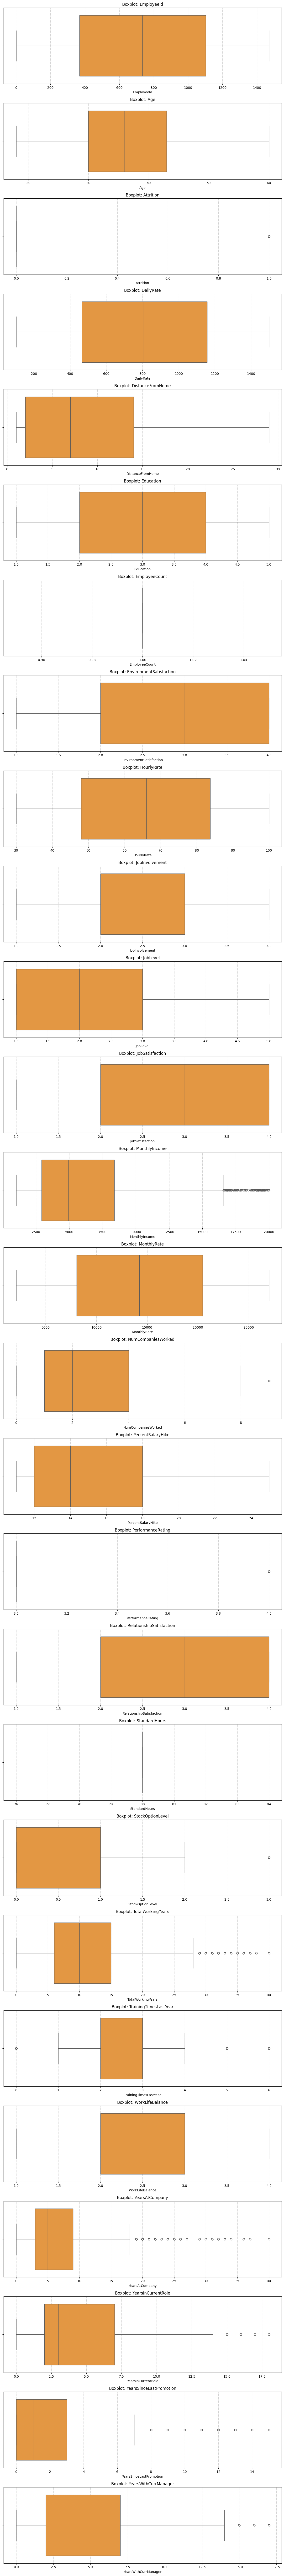

In [ ]:
plot_numeric_boxplots(df_employee)

## **3. Exploratory Data Analysis**

In [4]:
df_employee_eda = df_employee.copy()

In [ ]:
df_employee_eda.select_dtypes(include='object').columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [ ]:
df_employee_eda.select_dtypes(include=['int', 'float']).columns

Index(['EmployeeId', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df_employee_eda.select_dtypes(include='float').columns

Index(['Attrition'], dtype='object')

In [ ]:
# Daftar kolom sesuai kategori
pure_numerical_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

In [ ]:
df_employee_eda['Attrition'] = df_employee_eda['Attrition'].apply(lambda x: 'Keluar' if x == 1 else 'Tidak Keluar')

### **3.1. Univariate Analysis**

In [ ]:
def plot_kategori(df, feature, warna='purple'):
    """
    Menampilkan jumlah dan persentase kategori serta plot batang dari suatu kolom kategorikal.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    feature (str): Nama kolom kategorikal.
    warna (str): Warna untuk bar chart (default = 'orange').
    """
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    df_summary = pd.DataFrame({
        'Jumlah Sampel': count,
        'Persentase (%)': percent.round(1)
    })

    print(f"\nRingkasan untuk kolom: {feature}")
    print(df_summary)
    print("\n")

    print("Visualisasi:")
    count.plot(kind='bar', title=feature, color=warna)
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_histogram_semua_kolom(df, bins=50, figsize=(12, 25), color='purple'):
    """
    Menampilkan histogram dari semua kolom numerik di dalam dataframe menggunakan seaborn.histplot.

    Parameters:
    df (DataFrame): DataFrame yang akan diplot.
    bins (int): Jumlah bin pada histogram.
    figsize (tuple): Ukuran figure.
    color (str): Warna histogram.
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 2) // 3  # 3 kolom per baris

    plt.figure(figsize=figsize)
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, 3, i)
        sns.histplot(df[col], bins=bins, kde=True, color=color)
        plt.title(f'Histogram: {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
        plt.tight_layout()
    plt.show()

In [9]:
def plot_histogram(df, x, hue='Attrition', bins=20, group_by=None, group_value=None):
    """
    Menampilkan histogram variabel numerik dengan pewarnaan berdasarkan kategori hue.
    Juga menampilkan ringkasan frekuensi, persentase, dan statistik deskriptif (describe) berdasarkan hue.

    Parameters:
    df (DataFrame): DataFrame yang berisi data
    x (str): Nama kolom numerik yang ingin diplot di sumbu x
    hue (str): Nama kolom kategori untuk membedakan warna (default: 'Attrition')
    bins (int): Jumlah bin untuk histogram (default: 20)
    group_by (str, optional): Kolom kategori untuk menyaring data (misalnya 'Gender')
    group_value (str, optional): Nilai spesifik dari kolom group_by untuk difilter (misalnya 'Male')
    """

    # Filter data jika group_by dan group_value diberikan
    if group_by and group_value:
        df = df[df[group_by] == group_value]

    # Ringkasan frekuensi dan persentase
    summary = df[hue].value_counts().to_frame(name='Jumlah Sampel')
    summary['Persentase (%)'] = round(summary['Jumlah Sampel'] / summary['Jumlah Sampel'].sum() * 100, 1)

    if group_by and group_value:
        print(f"\nRingkasan Kategorikal untuk {group_by} = {group_value}")
    else:
        print("\nRingkasan Kategorikal (tanpa filter tambahan)")
    print(summary)

    # Ringkasan statistik deskriptif numerik berdasarkan hue
    print(f"\nRingkasan Statistik '{x}' berdasarkan '{hue}':")
    print(df.groupby(hue)[x].describe().round(2))
    print("\n")

    print("Visualisasi:")
    # Plot histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=x, hue=hue, multiple='stack', kde=True, bins=bins)
    title = f'{hue} vs {x}'
    if group_by and group_value:
        title += f' (Filtered: {group_by} = {group_value})'
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [12]:
def plot_pie_chart(df, x, hue):
    """
    Menampilkan ringkasan dan visualisasi pie chart berdasarkan nilai unik dari kolom x,
    dengan distribusi kategori berdasarkan kolom hue.

    Parameters:
    df (DataFrame): Dataset
    x (str): Kolom kategorikal utama (misalnya Gender, Department, dsb)
    hue (str): Kolom kategorikal kedua untuk dibandingkan (misalnya Attrition)
    """
    unique_vals = df[x].unique()
    n = len(unique_vals)
    rows = (n + 2) // 3  # Maksimum 3 pie chart per baris

    for val in unique_vals:
        subset = df[df[x] == val]
        counts = subset[hue].value_counts().sort_index()
        total = counts.sum()
        percentages = (counts / total * 100).round(1)

        # Tampilkan ringkasan tabel
        summary_df = pd.DataFrame({
            'Jumlah Sampel': counts,
            'Persentase (%)': percentages
        })
        print(f"\nRingkasan untuk {x} = {val}")
        print(summary_df)

    print("\nVisualisasi:")

    # Pie chart
    plt.figure(figsize=(16, 5 * rows))
    for i, val in enumerate(unique_vals, 1):
        subset = df[df[x] == val]
        counts = subset[hue].value_counts().sort_index()
        percentages = (counts / counts.sum() * 100).round(1)

        plt.subplot(rows, 3, i)
        plt.pie(counts, labels=[f"{idx} ({p}%)" for idx, p in percentages.items()],
                autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribusi {x} - {val} berdasarkan {hue}')

    plt.tight_layout()
    plt.show()

#### Analisis Distribusi Attrition

Untuk memahami bagaimana distribusi `karyawan yang keluar (attrition)` dan yang tetap bekerja di perusahaan, dapat memvisualisasikannya menggunakan `bar chart`. Visualisasi ini akan membantu melihat jumlah absolut serta persentase dari setiap kategori pada kolom `Attrition`.


Ringkasan untuk kolom: Attrition
              Jumlah Sampel  Persentase (%)
Attrition                                  
Tidak Keluar           1291            87.8
Keluar                  179            12.2


Visualisasi:


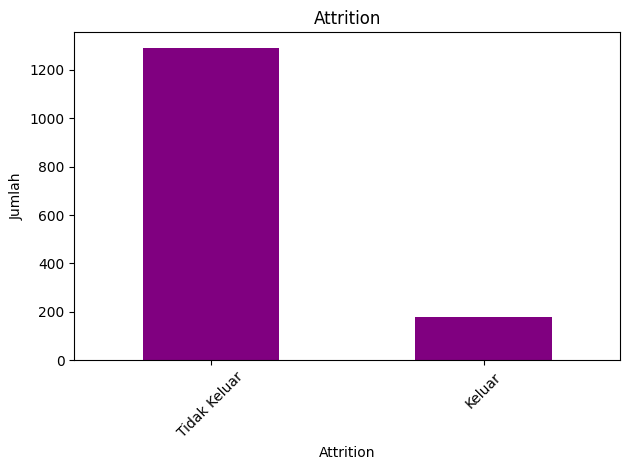

In [ ]:
plot_kategori(df_employee_eda, 'Attrition')

Berdasarkan hasil di atas, terlihat bahwa:
- Sebanyak 87.8% karyawan (1291 orang) berada dalam status `"Tidak Keluar"`, yang berarti mereka masih bekerja di perusahaan.
- Sebaliknya, hanya 12.2% karyawan (179 orang) yang mengalami `Attrition atau keluar dari perusahaan`.

Distribusi ini menunjukkan `adanya ketimpangan kelas (class imbalance)` dalam data, di mana proporsi antara karyawan yang keluar dan tidak keluar cukup jomplang. Dalam konteks analisis prediktif, kondisi ini perlu diperhatikan karena model machine learning cenderung bias terhadap kelas mayoritas. Selain itu, meskipun hanya sebagian kecil karyawan yang keluar, `attrition` bisa menjadi sinyal penting yang berkaitan dengan isu retensi, kepuasan kerja, dan budaya organisasi yang perlu ditindaklanjuti oleh perusahaan.

#### Distribusi Semua Fitur Numerik

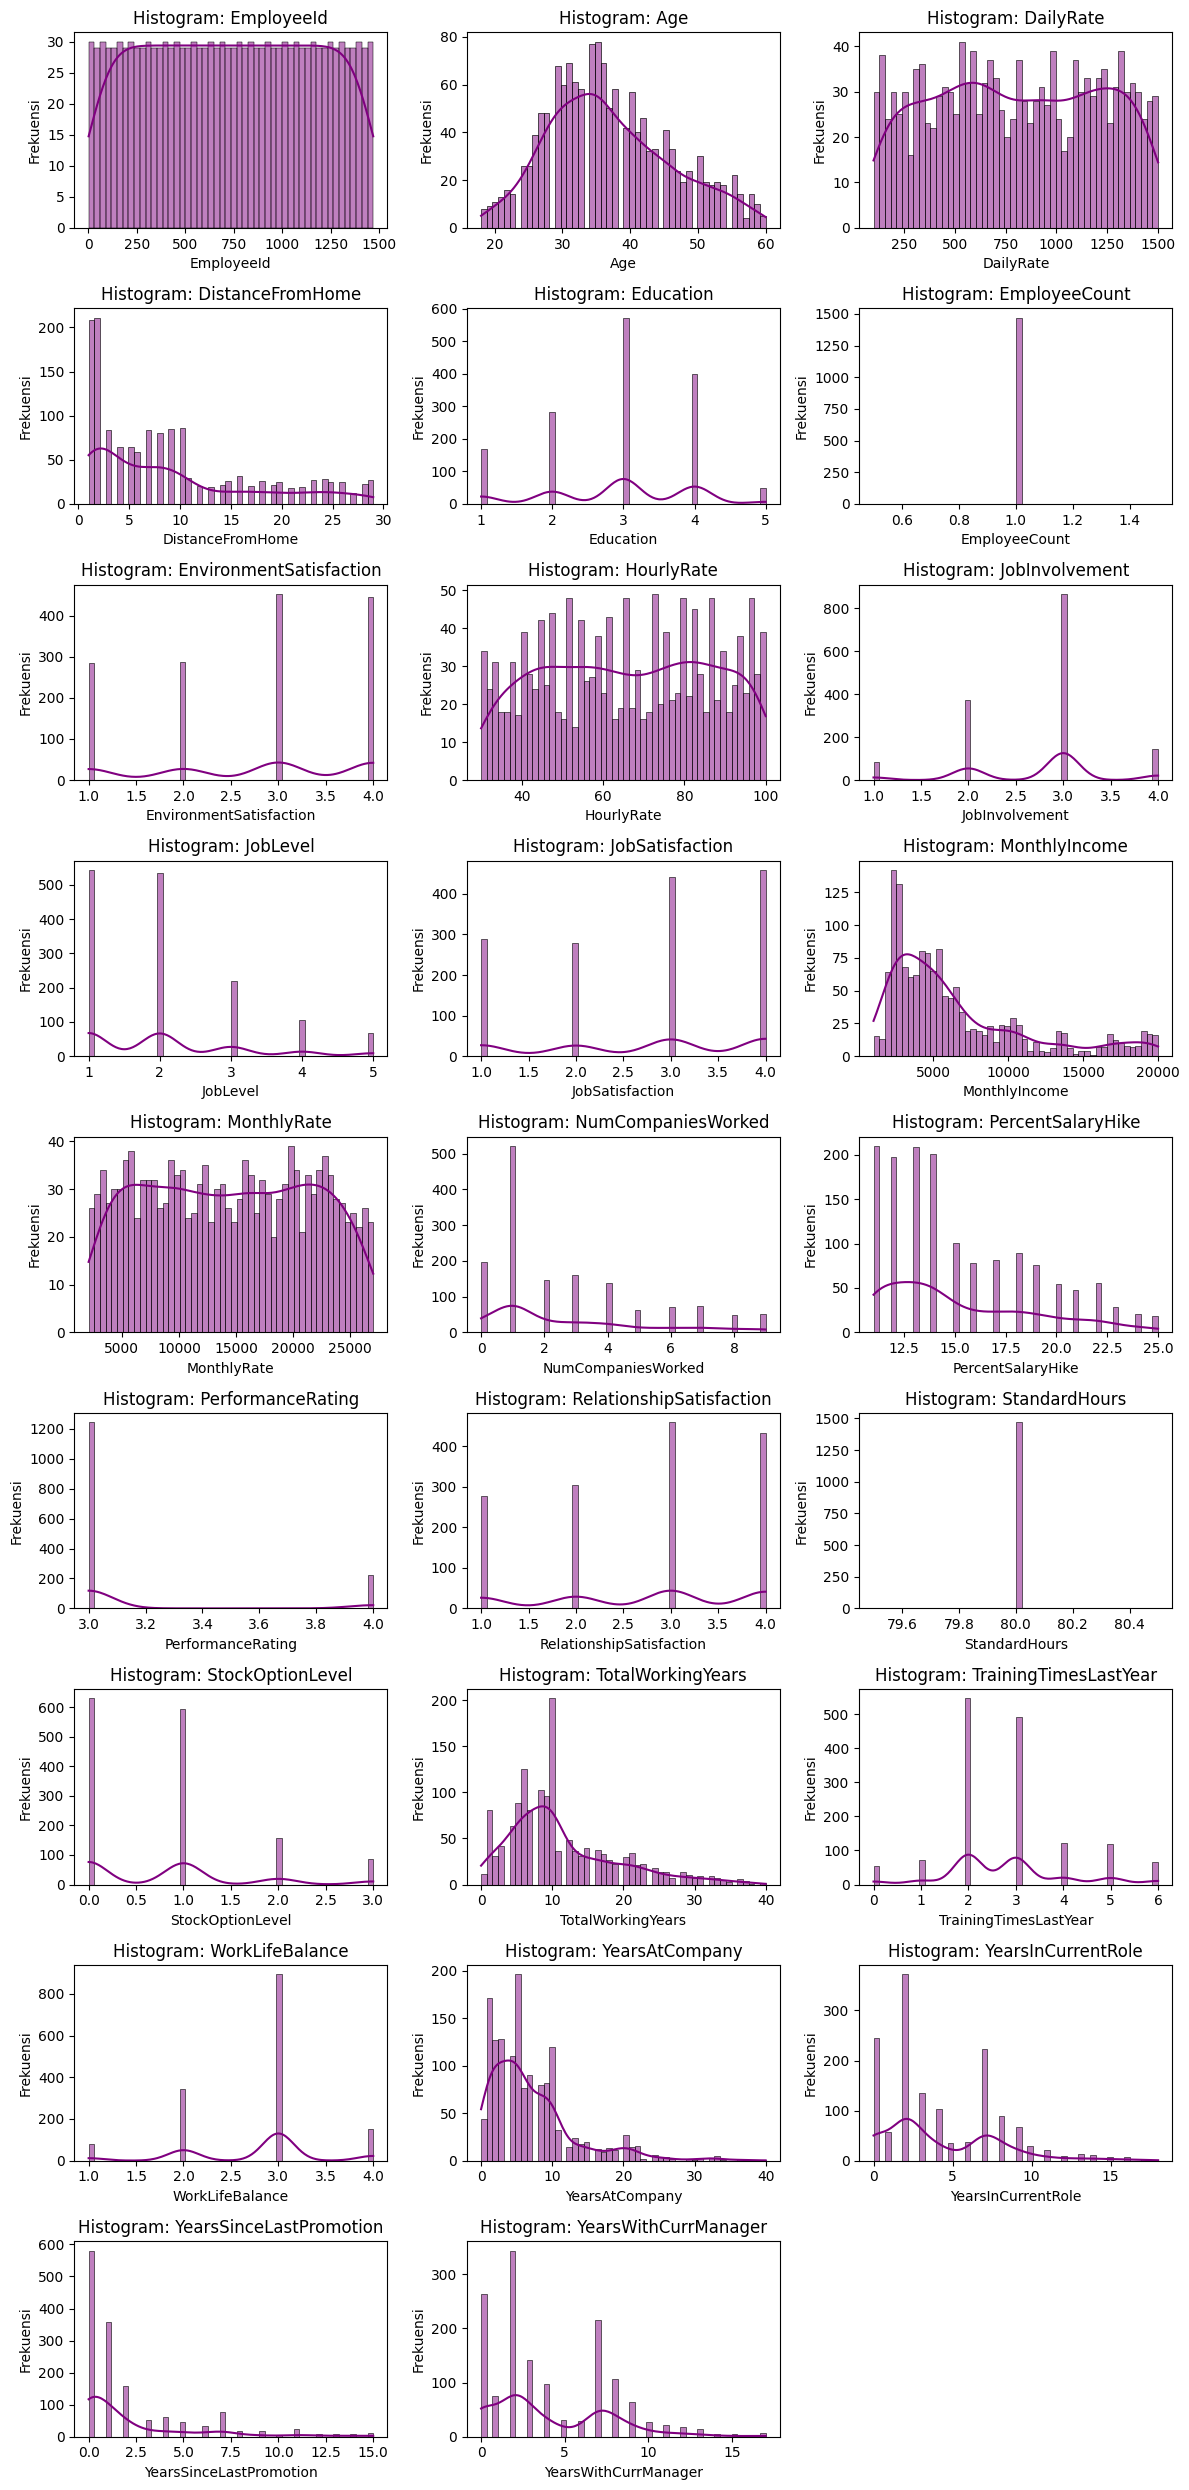

In [ ]:
plot_histogram_semua_kolom(df_employee_eda)

### 3.1.2. Bivariate Analysis

In [16]:
def plot_kategori_bivariate(df, x, hue='Attrition', colors=None):
    """
    Menampilkan jumlah dan persentase kategori serta stacked bar chart dengan hue dari suatu kolom kategorikal.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    x (str): Nama kolom kategorikal utama.
    hue (str): Nama kolom kategorikal kedua (default = 'Attrition').
    colors (list): Daftar warna untuk setiap kategori hue.
    """
    # Crosstab
    crosstab = pd.crosstab(df[x], df[hue])
    percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

    # Tampilkan ringkasan
    print(f"\nRingkasan untuk kolom: {x}")
    summary_df = pd.concat([
        crosstab.rename(columns=lambda val: f"Jumlah {hue}={val}"),
        percent.rename(columns=lambda val: f"Persentase {hue}={val} (%)").round(1)
    ], axis=1)
    print(summary_df)

    print("\nVisualisasi:")

    # Plot stacked bar chart
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
    plt.title(f"Distribusi {x} berdasarkan {hue}")
    plt.ylabel("Jumlah")
    plt.xlabel(x)
    plt.xticks(rotation=45)
    plt.legend(title=hue)
    plt.tight_layout()
    plt.show()

#### Analisis Umur, Jenis Kelamin, Status Pernikahan, Tingkat Pendidikan

##### Age

Untuk mengetahui apakah `usia (Age)` memiliki hubungan dengan kecenderungan karyawan untuk `keluar dari perusahaan (Attrition)`, kita dapat menggunakan visualisasi `histogram` yang dipisahkan berdasarkan kategori `attrition (keluar atau tidak)`. Histogram ini akan menunjukkan distribusi usia dalam masing-masing kelompok dan membantu kita melihat `apakah ada perbedaan pola usia antara karyawan yang keluar dan yang tetap bekerja`.


Ringkasan Kategorikal (tanpa filter tambahan)
           Jumlah Sampel  Persentase (%)
Attrition                               
0.0                  879            83.1
1.0                  179            16.9

Ringkasan Statistik 'Age' berdasarkan 'Attrition':
           count   mean   std   min   25%   50%   75%   max
Attrition                                                  
0.0        879.0  37.79  9.16  18.0  31.0  36.0  44.0  60.0
1.0        179.0  33.47  9.83  18.0  26.0  31.0  39.0  58.0


Visualisasi:


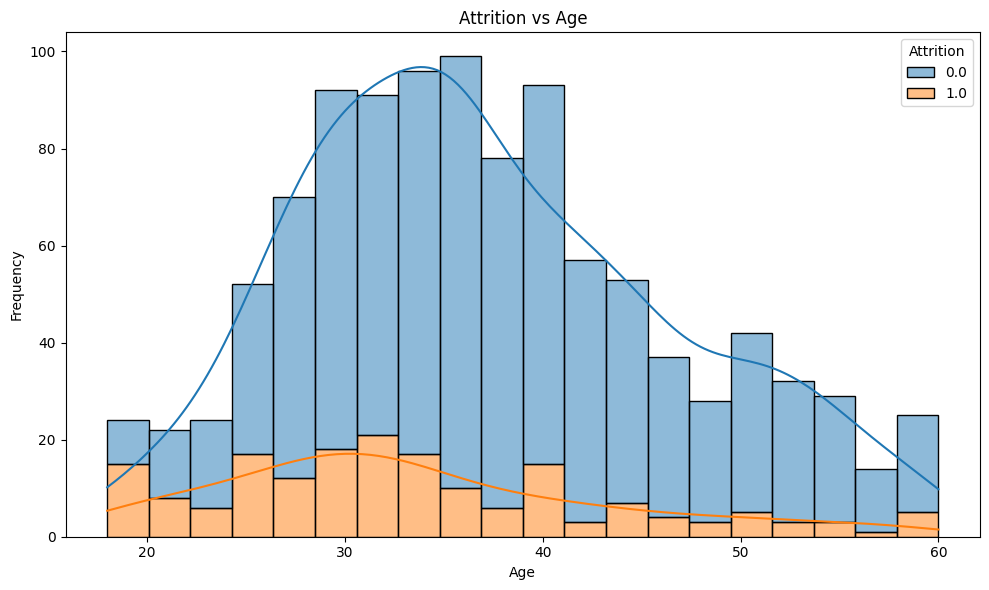

In [10]:
plot_histogram(df_employee_eda, x='Age', hue='Attrition')

Dari hasil visualisasi dan ringkasan statistik di atas, kita bisa menarik beberapa kesimpulan penting:
- `Usia` rata-rata `karyawan yang tidak keluar (Attrition = 0.0)` adalah sekitar `37.8 tahun`, sedangkan `karyawan yang keluar (Attrition = 1.0)` memiliki usia rata-rata `lebih rendah yaitu sekitar 33.5 tahun`.
- Distribusi usia karyawan yang keluar `cenderung berkonsentrasi pada kelompok usia muda (25–39 tahun)`, terlihat dari nilai kuartil:

    - Median usia karyawan yang keluar adalah 31 tahun, sedangkan yang bertahan adalah 36 tahun.

- Hal ini menunjukkan bahwa `karyawan yang lebih muda` cenderung memiliki `kemungkinan lebih tinggi untuk keluar dari perusahaan` dibandingkan karyawan yang lebih tua.

**Insight:**
Perusahaan mungkin perlu memfokuskan perhatian lebih pada kelompok usia muda, misalnya melalui program pengembangan karier, pelatihan, atau insentif untuk meningkatkan retensi. Faktor seperti ekspektasi karier, fleksibilitas, atau kepuasan awal dalam pekerjaan bisa menjadi alasan utama attrition pada kelompok usia ini.

##### Gender

Untuk mengetahui apakah `jenis kelamin (Gender)` berpengaruh terhadap tingkat attrition atau pengunduran diri karyawan, kita dapat membuat visualisasi berupa `pie chart` yang memperlihatkan proporsi karyawan yang keluar dan tetap, terpisah untuk laki-laki (Male) dan perempuan (Female).

Visualisasi ini membantu memahami apakah salah satu gender memiliki kecenderungan lebih tinggi dalam melakukan attrition.


Ringkasan untuk Gender = Male
           Jumlah Sampel  Persentase (%)
Attrition                               
0.0                  512            82.6
1.0                  108            17.4

Ringkasan untuk Gender = Female
           Jumlah Sampel  Persentase (%)
Attrition                               
0.0                  367            83.8
1.0                   71            16.2

Visualisasi:


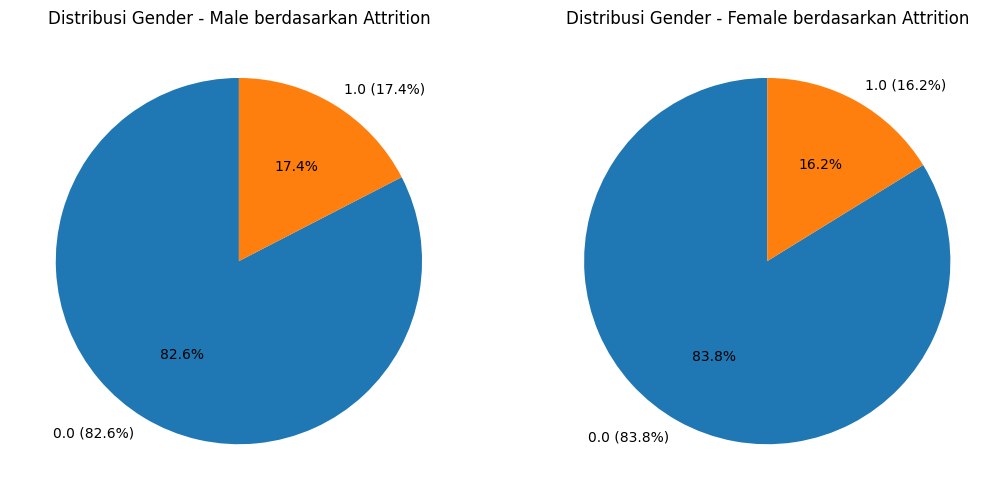

In [14]:
plot_pie_chart(df_employee_eda, x='Gender', hue='Attrition')

Berdasarkan ringkasan dan visualisasi `pie chart`, terlihat bahwa tingkat attrition antara karyawan laki-laki dan perempuan hampir sama, yaitu sekitar `12.2%` untuk `laki-laki` dan `12.1%` untuk `perempuan`. Ini menunjukkan bahwa `jenis kelamin bukan merupakan faktor signifikan` yang membedakan tingkat pengunduran diri karyawan dalam dataset ini.

**Insight:** Tingkat kepergian karyawan cenderung merata antar `gender`, sehingga program retensi karyawan tidak perlu terlalu dibedakan berdasarkan jenis kelamin.

##### MaritalStatus

Untuk mengevaluasi apakah `status pernikahan karyawan` memiliki pengaruh terhadap kemungkinan mereka `keluar dari perusahaan (attrition)`, kita akan menggunakan visualisasi `pie chart` berdasarkan nilai dari kolom `MaritalStatus` dan `Attrition`.

Visualisasi ini akan membantu kita membandingkan persentase karyawan yang keluar vs. tetap bekerja berdasarkan status mereka sebagai `menikah (Married)`, `lajang (Single)`, atau `cerai (Divorced)`.


Ringkasan untuk MaritalStatus = Married
           Jumlah Sampel  Persentase (%)
Attrition                               
0.0                  402            86.6
1.0                   62            13.4

Ringkasan untuk MaritalStatus = Single
           Jumlah Sampel  Persentase (%)
Attrition                               
0.0                  258            73.3
1.0                   94            26.7

Ringkasan untuk MaritalStatus = Divorced
           Jumlah Sampel  Persentase (%)
Attrition                               
0.0                  219            90.5
1.0                   23             9.5

Visualisasi:


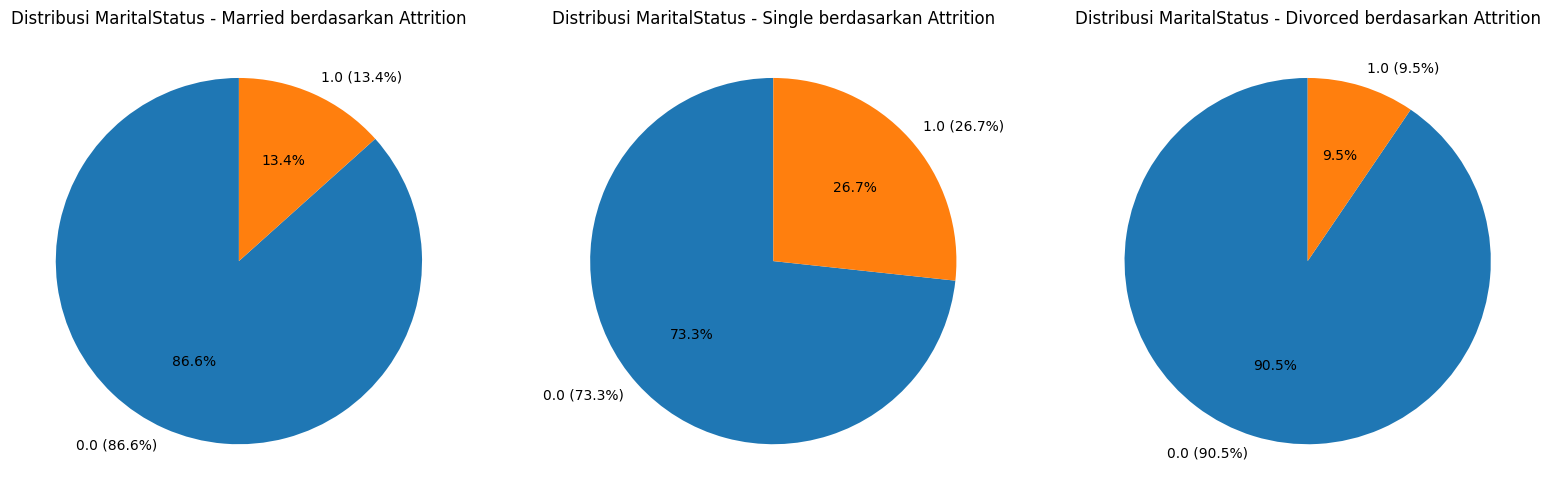

In [13]:
plot_pie_chart(df_employee_eda, x='MaritalStatus', hue='Attrition')

Hasil analisis menunjukkan bahwa `status pernikahan` memiliki hubungan yang cukup mencolok dengan tingkat `attrition`:

- Karyawan `lajang (Single)` memiliki tingkat `attrition tertinggi` yaitu `20%`.
- Karyawan `menikah (Married)` memiliki tingkat `attrition yang lebih rendah`, yaitu `9.2%`.
- Karyawan `bercerai (Divorced)` memiliki tingkat `attrition terendah` yaitu `7%`.

Temuan ini mengindikasikan bahwa `karyawan lajang lebih cenderung untuk keluar dari perusahaan` dibandingkan dengan yang sudah menikah atau bercerai. Hal ini bisa disebabkan oleh fleksibilitas yang lebih besar dalam mengambil keputusan karier, mobilitas yang tinggi, atau pencarian peluang yang lebih baik.

**Insight:** Strategi retensi karyawan bisa mempertimbangkan faktor status pernikahan, khususnya dengan memberi perhatian lebih kepada karyawan lajang yang mungkin membutuhkan motivasi atau insentif tambahan untuk tetap bertahan di perusahaan.










##### Education

Untuk memahami hubungan antara `tingkat pendidikan karyawan` dan kemungkinan mereka `keluar dari perusahaan (Attrition)`, dilakukan visualisasi terhadap variabel `Education`.

Variabel ini bersifat ordinal dan dikodekan sebagai berikut:
- 1 = Di bawah kuliah
- 2 = Kuliah
- 3 = Sarjana (S1)
- 4 = Magister (S2)
- 5 = Doktor (S3)

Dengan visualisasi ini, kita dapat melihat apakah terdapat pola tertentu antara tingkat pendidikan dan tingkat attrition karyawan.


Ringkasan untuk kolom: Education
Attrition  Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
Education                                               
1                           105                    26   
2                           177                    31   
3                           334                    76   
4                           232                    44   
5                            31                     2   

Attrition  Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
Education                                                              
1                                  80.2                          19.8  
2                                  85.1                          14.9  
3                                  81.5                          18.5  
4                                  84.1                          15.9  
5                                  93.9                           6.1  

Visualisasi:


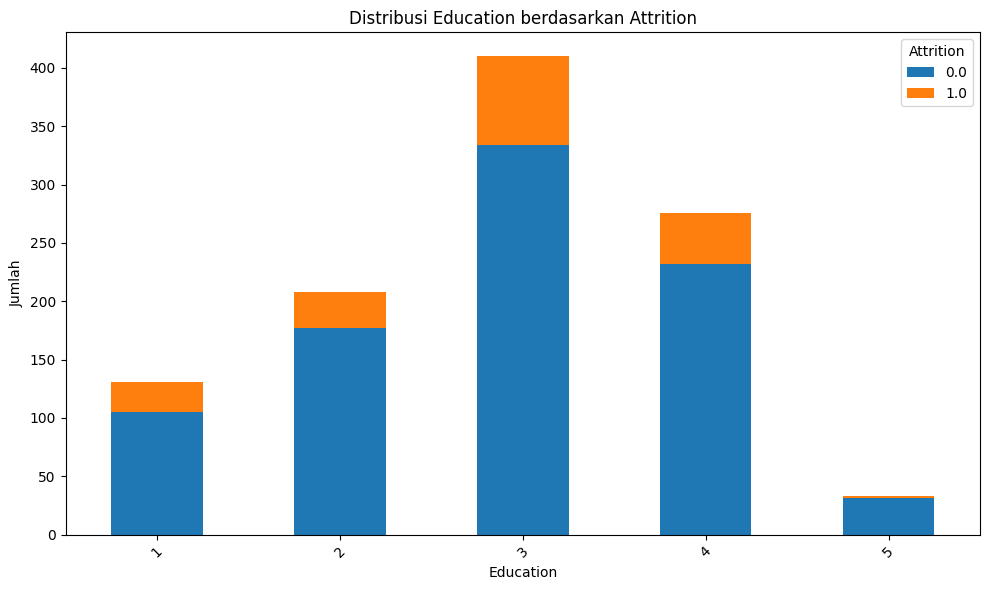

In [20]:
plot_kategori_bivariate(df_employee_eda, x='Education', hue='Attrition')

Berdasarkan hasil visualisasi dan ringkasan statistik, dapat disimpulkan bahwa:
- Karyawan dengan `pendidikan terendah (kategori 1)` memiliki tingkat `attrition` sebesar 19.8%, yang `cukup tinggi` dibandingkan tingkat lainnya.
- Karyawan dengan `pendidikan kuliah (kategori 2) dan S1 (kategori 3)` juga menunjukkan tingkat `attrition yang relatif tinggi`, masing-masing sebesar 14.9% dan 18.5%.
- Menariknya, tingkat `attrition cenderung menurun seiring dengan peningkatan tingkat pendidikan`. Misalnya, `karyawan dengan gelar S3 (kategori 5) memiliki tingkat attrition terendah`, hanya 6.1%.
- Hal ini menunjukkan bahwa karyawan dengan tingkat pendidikan yang lebih tinggi cenderung lebih stabil dan bertahan lebih lama di perusahaan.

**Insight:** Pendidikan yang lebih tinggi mungkin berkontribusi terhadap loyalitas yang lebih besar, atau bisa juga mencerminkan posisi atau peran yang lebih strategis dan memuaskan di perusahaan.

#### Analisis Department, JobRole, dan BusinessTravel

##### Department

Untuk memahami apakah `departemen tempat karyawan bekerja` memiliki hubungan dengan kecenderungan mereka untuk `mengundurkan diri (attrition)`, kita akan membuat analisis bivariate menggunakan fungsi `plot_kategori_bivariate`.

Visualisasi ini akan memperlihatkan jumlah dan persentase karyawan yang keluar dan tetap di perusahaan berdasarkan setiap kategori dalam kolom Department.


Ringkasan untuk kolom: Department
Attrition               Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
Department                                                           
Human Resources                           32                     6   
Research & Development                   594                   107   
Sales                                    253                    66   

Attrition               Persentase Attrition=0.0 (%)  \
Department                                             
Human Resources                                 84.2   
Research & Development                          84.7   
Sales                                           79.3   

Attrition               Persentase Attrition=1.0 (%)  
Department                                            
Human Resources                                 15.8  
Research & Development                          15.3  
Sales                                           20.7  

Visualisasi:


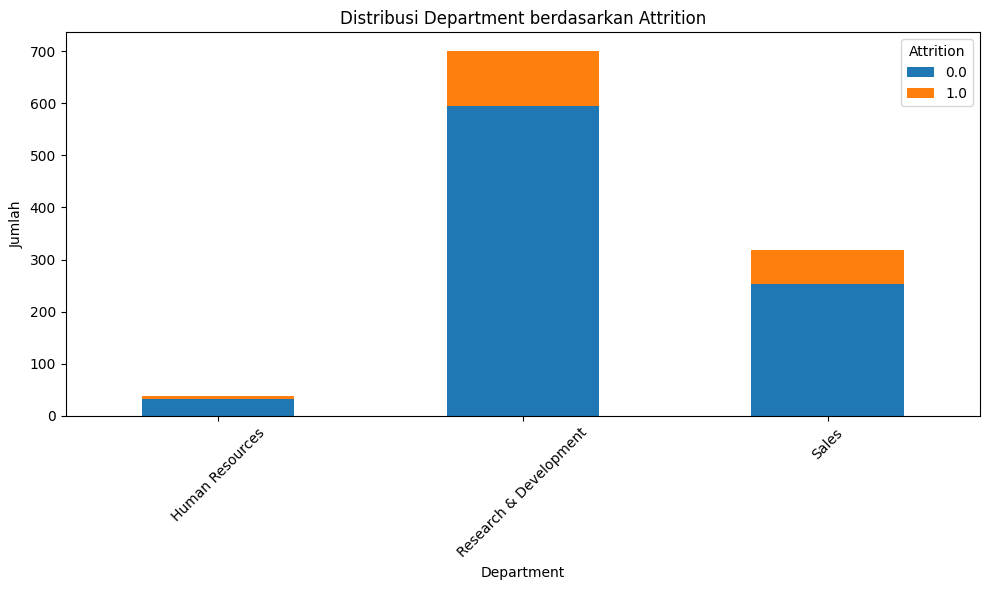

In [17]:
plot_kategori_bivariate(df_employee_eda, x='Department', hue='Attrition')

Hasil analisis menunjukkan adanya perbedaan tingkat attrition antar departemen:
- Departemen `Sales` mencatat tingkat `attrition tertinggi` yaitu 20.7%, yang menunjukkan bahwa satu dari lima karyawan di departemen ini cenderung keluar dari perusahaan.
- Departemen `Human Resources (HR)` memiliki tingkat `attrition` sebesar 15.8%, `sedikit lebih tinggi` dibandingkan Research & Development (R&D) yang berada di angka 15.3%.
- Departemen `R&D`, meskipun memiliki `jumlah karyawan terbesar`, menunjukkan `tingkat retensi yang relatif lebih baik` dibandingkan Sales.

**Insight:** Temuan ini dapat menjadi dasar bagi manajemen untuk menyelidiki lebih lanjut kondisi kerja, kepuasan, atau tantangan spesifik yang dihadapi oleh karyawan di departemen tertentu, terutama di bagian `Sales`, yang tampaknya `lebih rentan terhadap turnover`. Pendekatan yang lebih terfokus untuk `retensi karyawan dapat difokuskan pada departemen dengan tingkat attrition yang tinggi`.

##### JobRole

Untuk mengetahui apakah `peran pekerjaan (JobRole)` berpengaruh terhadap `attrition (pengunduran diri)` karyawan, kita akan menganalisis distribusi jumlah karyawan yang keluar dan tetap bekerja berdasarkan `peran mereka`. Dengan menggunakan visualisasi `bivariate`, kita dapat melihat apakah ada kecenderungan tertentu pada jenis pekerjaan yang lebih sering mengalami attrition.


Ringkasan untuk kolom: JobRole
Attrition                  Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
JobRole                                                                 
Healthcare Representative                    80                     8   
Human Resources                              24                     6   
Laboratory Technician                       139                    49   
Manager                                      74                     5   
Manufacturing Director                      100                     7   
Research Director                            60                     2   
Research Scientist                          176                    38   
Sales Executive                             193                    39   
Sales Representative                         33                    25   

Attrition                  Persentase Attrition=0.0 (%)  \
JobRole                                                   
Healthcare Representative                     

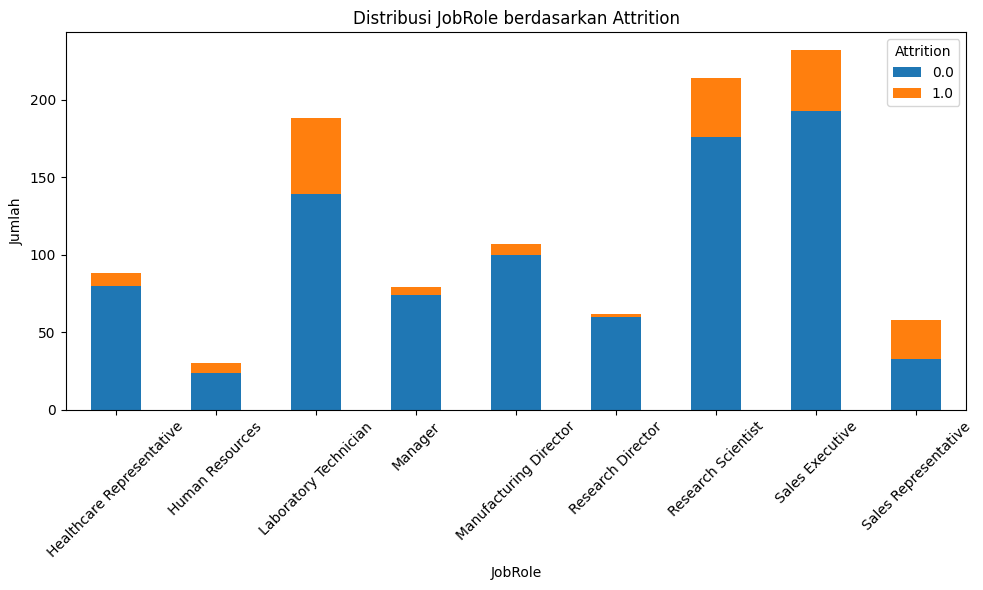

In [19]:
plot_kategori_bivariate(df_employee_eda, x='JobRole', hue='Attrition')

Hasil analisis menunjukkan perbedaan signifikan dalam tingkat attrition berdasarkan peran pekerjaan yang dimiliki oleh karyawan:

- `Sales Representative` memiliki tingkat `attrition tertinggi`, yaitu 30.1%, yang menunjukkan bahwa `hampir sepertiga dari karyawan di peran ini keluar dari perusahaan`. Hal ini mungkin `disebabkan oleh tantangan dalam pekerjaan penjualan` atau faktor lain yang perlu dieksplorasi lebih lanjut.
- `Laboratory Technician dan Research Scientist` juga memiliki tingkat `attrition yang cukup tinggi`, yaitu 18.9% dan 13.0%. Ini menunjukkan bahwa beberapa `peran teknis dan penelitian mengalami tingkat turnover yang lebih besar` dibandingkan peran manajerial.
- Sebaliknya, `Research Director, Manufacturing Director, dan Manager` memiliki tingkat `attrition yang sangat rendah`, yakni di bawah 5%, yang menunjukkan bahwa karyawan di peran-peran ini lebih stabil dalam perusahaan.

**Insight:** Perusahaan bisa mengidentifikasi peran yang mungkin memerlukan perhatian khusus dalam hal retensi karyawan, seperti `Sales Representative`, atau `menyelidiki alasan tingginya tingkat attrition pada peran teknis atau penelitian tertentu`.

##### BusinessTravel

`Perjalanan dinas (Business Travel)` dapat menjadi faktor yang memengaruhi kepuasan dan loyalitas karyawan. Karyawan yang sering melakukan perjalanan mungkin mengalami kelelahan, kurangnya waktu bersama keluarga, atau tekanan kerja yang lebih tinggi. Untuk mengeksplorasi apakah frekuensi perjalanan dinas berkaitan dengan attrition, kita akan menggunakan visualisasi `barplot bivariate` berdasarkan kategori `BusinessTravel` dan hue `Attrition`.


Ringkasan untuk kolom: BusinessTravel
Attrition          Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
BusinessTravel                                                  
Non-Travel                           96                    11   
Travel_Frequently                   154                    51   
Travel_Rarely                       629                   117   

Attrition          Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
BusinessTravel                                                                 
Non-Travel                                 89.7                          10.3  
Travel_Frequently                          75.1                          24.9  
Travel_Rarely                              84.3                          15.7  

Visualisasi:


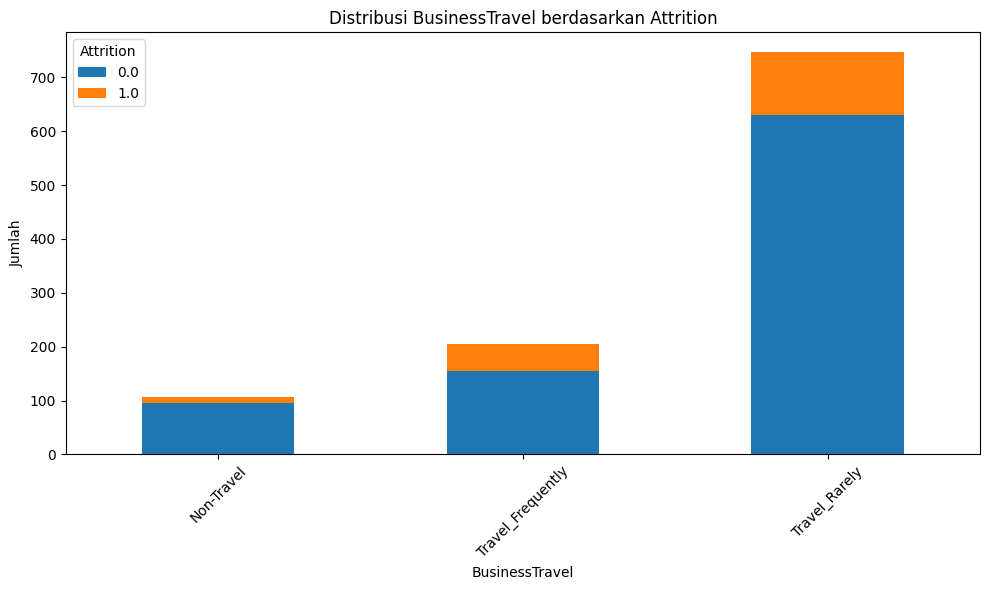

In [18]:
plot_kategori_bivariate(df_employee_eda, x='BusinessTravel', hue='Attrition')

Hasil visualisasi dan ringkasan menunjukkan adanya perbedaan signifikan dalam tingkat attrition berdasarkan frekuensi perjalanan dinas:
- Karyawan yang `sering bepergian (Travel_Frequently)` memiliki tingkat `attrition tertinggi`, yaitu 18.4%. Ini menunjukkan bahwa `seringnya bepergian dapat menjadi salah satu pemicu keinginan untuk keluar dari perusahaan`.
- Karyawan yang `jarang bepergian (Travel_Rarely)` memiliki tingkat `attrition` sebesar 11.2%, `lebih rendah` dibandingkan mereka yang sering bepergian, tetapi masih cukup signifikan.
- Menariknya, karyawan yang `tidak pernah bepergian (Non-Travel)` memiliki tingkat `attrition paling rendah`, yaitu hanya 7.3%.

**Insight:** Temuan ini mengindikasikan bahwa `frekuensi perjalanan dinas berhubungan positif dengan kemungkinan attrition`. Oleh karena itu, perusahaan perlu mempertimbangkan keseimbangan kerja dan perjalanan serta menyediakan dukungan tambahan bagi karyawan yang sering bepergian guna meningkatkan retensi.

#### Analisis OverTime, WorkLifeBalance, JobSatisfaction, TrainingTimesLastYear, dan PerformanceRating

##### OverTime

`Waktu lembur yang berlebihan` sering dikaitkan dengan kelelahan kerja, stres, dan ketidakseimbangan kehidupan kerja. Hal ini dapat berdampak langsung pada kepuasan kerja dan keputusan karyawan untuk tetap bertahan atau mengundurkan diri dari perusahaan. Untuk memahami lebih dalam hubungan antara lembur (OverTime) dan attrition, kita akan memvisualisasikannya dalam bentuk `pie chart` yang dibedakan berdasarkan `status attrition`.


Ringkasan untuk OverTime = Yes
              Jumlah Sampel  Persentase (%)
Attrition                                  
Keluar                   98            23.6
Tidak Keluar            318            76.4

Ringkasan untuk OverTime = No
              Jumlah Sampel  Persentase (%)
Attrition                                  
Keluar                   81             7.7
Tidak Keluar            973            92.3

Visualisasi:


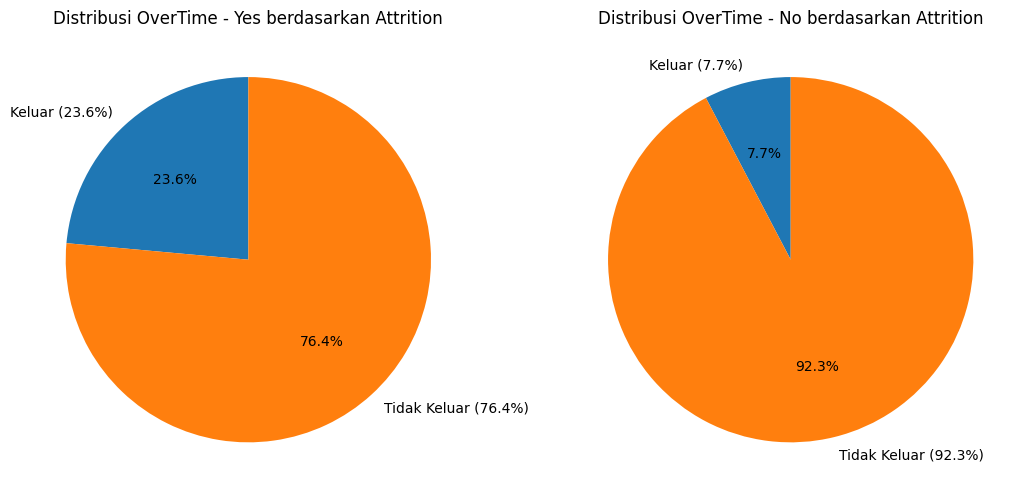

In [ ]:
plot_pie_chart(df_employee_eda, x='OverTime', hue='Attrition')

Hasil visualisasi menunjukkan bahwa karyawan yang lembur memiliki kemungkinan lebih tinggi untuk mengundurkan diri dibandingkan yang tidak lembur:
- Karyawan dengan `lembur (OverTime = Yes)` menunjukkan tingkat `attrition yang cukup tinggi` yaitu 23.6%.
- Sebaliknya, karyawan yang `tidak lembur (OverTime = No)` hanya memiliki `tingkat attrition sebesar 7.7%`.

**Insight:** Temuan ini menegaskan bahwa `lembur berpotensi meningkatkan risiko pengunduran diri`, kemungkinan karena faktor kelelahan, tekanan kerja, atau kurangnya waktu pribadi. Oleh karena itu, perusahaan disarankan untuk memantau beban kerja dan frekuensi lembur karyawan serta menyediakan dukungan atau kompensasi yang memadai untuk menjaga keseimbangan kerja dan kehidupan pribadi serta mengurangi tingkat attrition.

##### WorkLifeBalance

`Keseimbangan kehidupan kerja (Work-Life Balance)` merupakan salah satu faktor penting yang mempengaruhi kepuasan kerja dan keputusan karyawan untuk tetap berada dalam suatu organisasi. Karyawan yang merasa memiliki waktu yang cukup untuk kehidupan pribadi dan pekerjaan cenderung memiliki tingkat stres yang lebih rendah dan loyalitas yang lebih tinggi. Untuk mengevaluasi pengaruh WorkLifeBalance terhadap Attrition, kita akan menggunakan visualisasi `barplot bivariate`.


Ringkasan untuk kolom: WorkLifeBalance
Attrition        Jumlah Attrition=Keluar  Jumlah Attrition=Tidak Keluar  \
WorkLifeBalance                                                           
1                                     18                             62   
2                                     45                            299   
3                                     94                            799   
4                                     22                            131   

Attrition        Persentase Attrition=Keluar (%)  \
WorkLifeBalance                                    
1                                           22.5   
2                                           13.1   
3                                           10.5   
4                                           14.4   

Attrition        Persentase Attrition=Tidak Keluar (%)  
WorkLifeBalance                                         
1                                                 77.5  
2                        

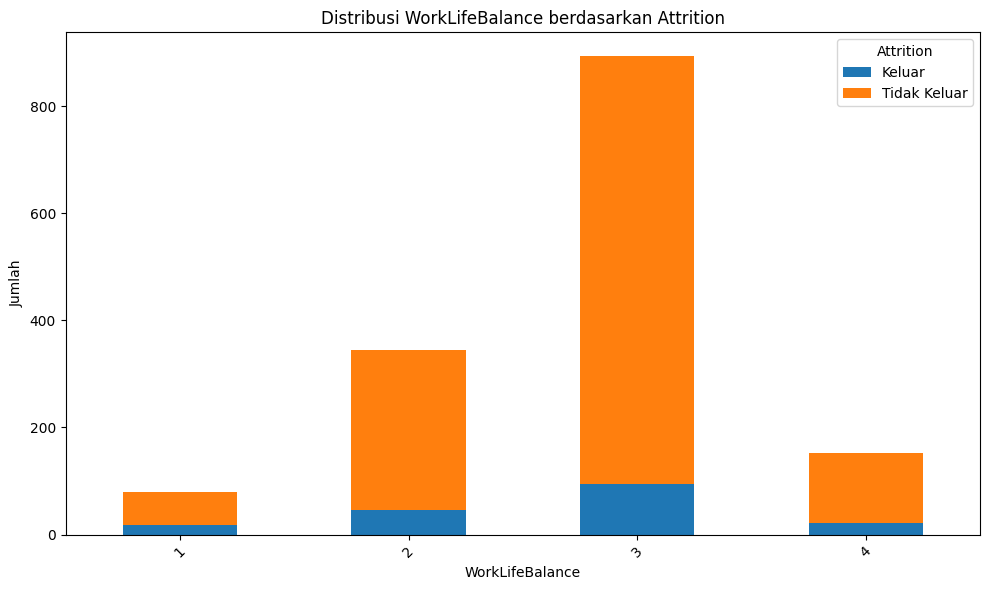

In [ ]:
plot_kategori_bivariate(df_employee_eda, x='WorkLifeBalance', hue='Attrition')

Hasil analisis menunjukkan adanya korelasi negatif antara tingkat WorkLifeBalance dan tingkat Attrition:

- Karyawan dengan `WorkLifeBalance = 1 (Poor)` memiliki tingkat `attrition tertinggi` sebesar 22.5%, menandakan bahwa `kurangnya keseimbangan antara kehidupan pribadi dan pekerjaan` berkontribusi terhadap keputusan untuk keluar dari perusahaan.
- Keseimbangan kerja yang membaik (level 2 dan 3) menunjukkan penurunan tingkat attrition, di mana `WorkLifeBalance = 3 (Good)` memiliki `attrition terendah` yaitu 10.5%.
- Menariknya, tingkat `attrition kembali sedikit naik pada level tertinggi yaitu WorkLifeBalance = 4 (Excellent)` sebesar 14.4%, yang mungkin menandakan adanya faktor lain yang juga berpengaruh seperti beban kerja, gaji, atau peluang karier.

**Insight:** Secara keseluruhan, data ini menunjukkan bahwa keseimbangan kehidupan kerja yang buruk dapat meningkatkan risiko pengunduran diri, sehingga penting bagi perusahaan untuk menjaga keseimbangan ini dengan kebijakan yang mendukung fleksibilitas dan kesehatan mental karyawan.

##### JobSatisfaction

`Kepuasan kerja (Job Satisfaction)` merupakan faktor penting dalam menentukan retensi karyawan. Karyawan yang merasa puas dengan pekerjaan mereka cenderung lebih setia dan tidak mudah meninggalkan perusahaan. Untuk memahami bagaimana tingkat kepuasan kerja memengaruhi tingkat pengunduran diri, kita akan memvisualisasikan hubungan antara JobSatisfaction dan Attrition menggunakan `bar chart bivariate`.


Ringkasan untuk kolom: JobSatisfaction
Attrition        Jumlah Attrition=Keluar  Jumlah Attrition=Tidak Keluar  \
JobSatisfaction                                                           
1                                     46                            243   
2                                     32                            248   
3                                     62                            380   
4                                     39                            420   

Attrition        Persentase Attrition=Keluar (%)  \
JobSatisfaction                                    
1                                           15.9   
2                                           11.4   
3                                           14.0   
4                                            8.5   

Attrition        Persentase Attrition=Tidak Keluar (%)  
JobSatisfaction                                         
1                                                 84.1  
2                        

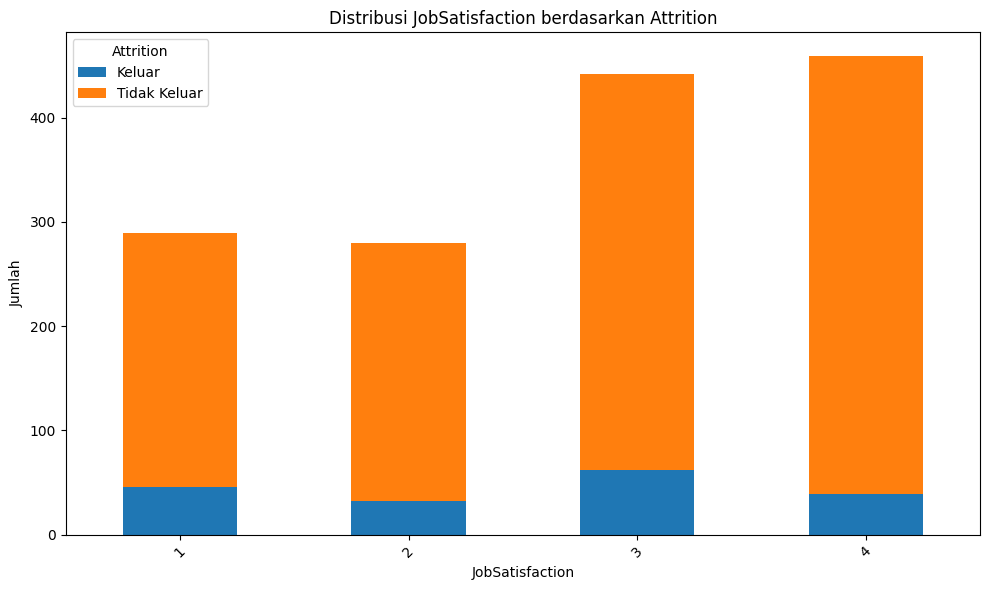

In [ ]:
plot_kategori_bivariate(df_employee_eda, x='JobSatisfaction', hue='Attrition')

Hasil analisis menunjukkan bahwa semakin tinggi tingkat kepuasan kerja, semakin rendah tingkat pengunduran diri (attrition):
- Karyawan dengan `JobSatisfaction = 1 (Very Low)` memiliki `tingkat attrition sebesar 15.9%`, menunjukkan bahwa ketidakpuasan kerja secara signifikan `berkontribusi terhadap keputusan untuk keluar` dari perusahaan.
- Tingkat `attrition secara umum menurun seiring meningkatnya kepuasan kerja`, dengan `JobSatisfaction = 4 (High)` hanya memiliki tingkat attrition sebesar 8.5%.
- Menariknya, `JobSatisfaction = 3 (Medium)` memiliki `tingkat attrition yang sedikit lebih tinggi dibandingkan level 2`, yaitu 14.0%, yang dapat menjadi indikasi bahwa `persepsi subjektif terhadap kepuasan kerja juga dipengaruhi oleh faktor eksternal lainnya`.

**Insight:** Secara keseluruhan, data ini memperkuat pentingnya menciptakan lingkungan kerja yang mendukung dan memuaskan bagi karyawan. Upaya untuk meningkatkan kepuasan kerja, seperti melalui pengakuan prestasi, kejelasan jalur karier, dan kompensasi yang adil, dapat menjadi strategi penting dalam mengurangi tingkat attrition.

##### TrainingTimesLastYear

Selanjutnya, dilakukan analisis terhadap variabel `TrainingTimesLastYear`, yaitu `jumlah pelatihan yang diikuti karyawan selama setahun terakhir`, untuk mengetahui apakah intensitas pelatihan berkorelasi dengan kemungkinan karyawan `keluar dari perusahaan (Attrition)`.

Dengan memvisualisasikan distribusi `TrainingTimesLastYear` berdasarkan `status Attrition`, kita dapat melihat apakah ada tren tertentu—misalnya, apakah karyawan yang jarang atau sering ikut pelatihan lebih cenderung keluar dari perusahaan.


Ringkasan untuk kolom: TrainingTimesLastYear
Attrition              Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
TrainingTimesLastYear                                               
0                                        30                    13   
1                                        48                     9   
2                                       328                    71   
3                                       288                    48   
4                                        73                    19   
5                                        73                    14   
6                                        39                     5   

Attrition              Persentase Attrition=0.0 (%)  \
TrainingTimesLastYear                                 
0                                              69.8   
1                                              84.2   
2                                              82.2   
3                                              85.7   
4 

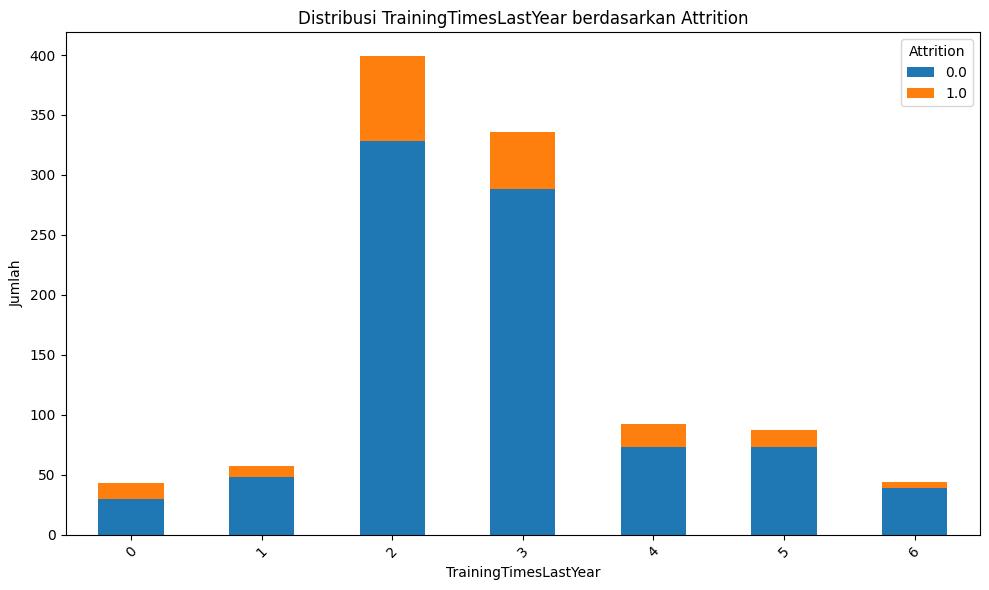

In [21]:
plot_kategori_bivariate(df_employee_eda, x='TrainingTimesLastYear', hue='Attrition')

Hasil visualisasi dan ringkasan statistik menunjukkan beberapa pola menarik:
- Karyawan yang `tidak pernah mengikuti pelatihan (0 kali)` memiliki tingkat `attrition tertinggi`, yaitu 30.2%. Ini menandakan bahwa `tidak diberi pelatihan sama sekali dapat memicu rasa ketidakpuasan dan mendorong karyawan untuk keluar`.
- Sebaliknya, karyawan yang `mengikuti pelatihan 1–6 kali dalam setahun` menunjukkan tingkat `attrition yang lebih rendah dan cenderung stabil` (berkisar antara 11.4%–20.7%).
- Tingkat `attrition terendah` ditemukan pada karyawan yang `mengikuti pelatihan sebanyak 6 kali`, dengan angka hanya 11.4%.

**Insight:** Secara keseluruhan, adanya pelatihan yang cukup tampaknya berkaitan dengan peningkatan retensi karyawan, baik karena meningkatkan kompetensi maupun rasa dihargai oleh perusahaan. Namun, `terlalu sedikit atau tidak ada pelatihan sama sekali justru berkorelasi dengan kecenderungan karyawan untuk keluar`.

##### PerformanceRating

Analisis berikutnya difokuskan pada variabel PerformanceRating, yaitu penilaian kinerja karyawan yang diberikan dalam skala 1 hingga 4, di mana nilai yang lebih tinggi menunjukkan kinerja yang lebih baik. Tujuan dari analisis ini adalah untuk melihat apakah tingkat kinerja berpengaruh terhadap kemungkinan seorang karyawan untuk keluar dari perusahaan (Attrition).

Dengan memvisualisasikan hubungan antara PerformanceRating dan Attrition, kita dapat mengevaluasi apakah karyawan dengan performa tinggi cenderung lebih loyal atau justru lebih mudah berpindah pekerjaan.


Ringkasan untuk kolom: PerformanceRating
Attrition          Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
PerformanceRating                                               
3                                   748                   151   
4                                   131                    28   

Attrition          Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
PerformanceRating                                                              
3                                          83.2                          16.8  
4                                          82.4                          17.6  

Visualisasi:


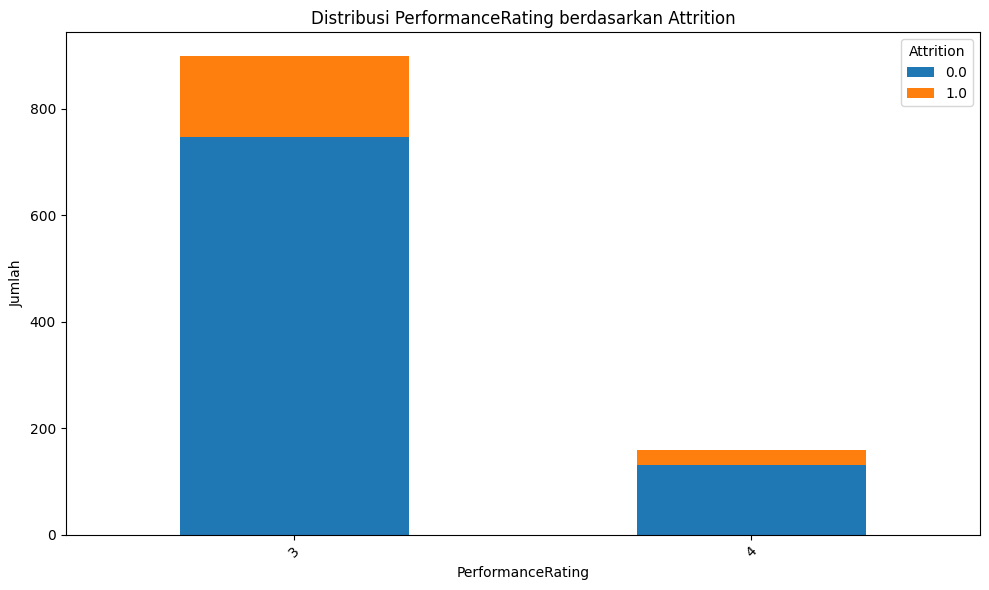

In [22]:
plot_kategori_bivariate(df_employee_eda, x='PerformanceRating', hue='Attrition')

Berdasarkan hasil visualisasi dan ringkasan data:
- Mayoritas karyawan berada pada rating kinerja 3 (Sangat Baik), dengan tingkat attrition sebesar 16.8%.
- Karyawan dengan rating kinerja tertinggi (4) memiliki tingkat attrition sedikit lebih tinggi, yaitu 17.6%.

Perbedaan tingkat attrition antar rating cukup kecil, sehingga tidak ditemukan hubungan yang kuat antara penilaian kinerja dan kecenderungan untuk keluar dari perusahaan. Ini menunjukkan bahwa meskipun karyawan dinilai berkinerja tinggi, hal tersebut belum tentu menjamin retensi, mungkin karena ada faktor lain seperti kepuasan kerja, pengakuan, atau peluang karier yang lebih memengaruhi keputusan mereka.

#### Analisis YearsAtCompany dan NumCompaniesWorked

##### YearsAtCompany

`Lama masa kerja karyawan di perusahaan` dapat menjadi indikator penting dalam mengidentifikasi risiko pengunduran diri. Karyawan dengan masa kerja pendek mungkin belum memiliki loyalitas yang kuat, sementara mereka yang telah bekerja lama mungkin lebih stabil atau justru sudah mendekati masa pensiun atau jenuh. Untuk memahami dinamika ini, kita akan memvisualisasikan hubungan antara `lama bekerja di perusahaan (YearsAtCompany)` dengan `attrition (keluar atau tidaknya karyawan)`.


Ringkasan untuk kolom: YearsAtCompany
Attrition       Jumlah Attrition=Keluar  Jumlah Attrition=Tidak Keluar  \
YearsAtCompany                                                           
0                                    11                             33   
1                                    44                            127   
2                                    19                            108   
3                                    18                            110   
4                                    14                             96   
5                                    15                            181   
6                                     8                             68   
7                                     9                             81   
8                                     8                             72   
9                                     5                             77   
10                                   13                            107   

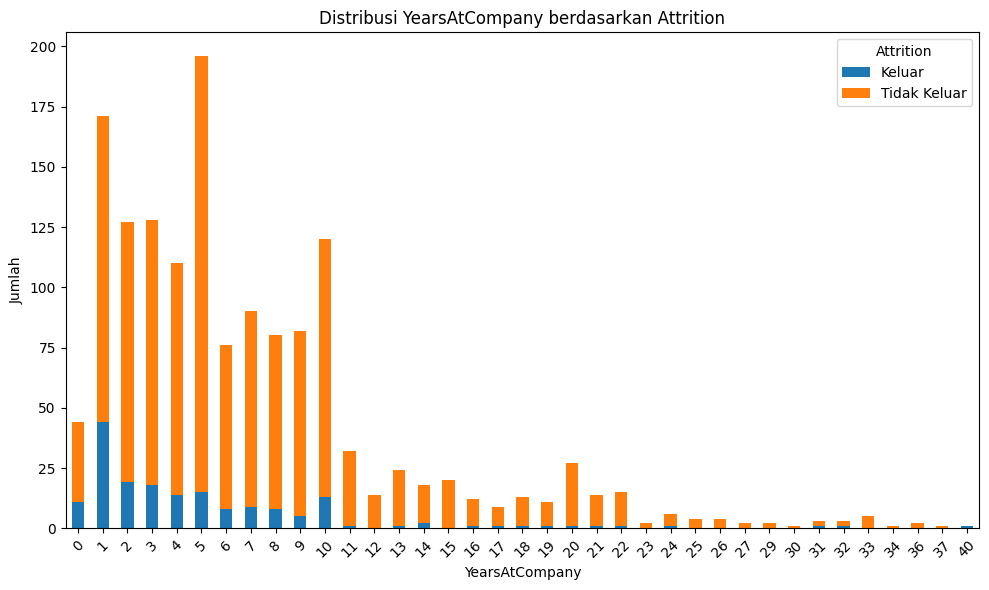

In [ ]:
plot_kategori_bivariate(df_employee_eda, x='YearsAtCompany', hue='Attrition')

Hasil visualisasi memperlihatkan bahwa masa kerja merupakan prediktor yang kuat untuk attrition:
- Karyawan `baru bergabung (0–1 tahun)` memiliki `kemungkinan lebih tinggi untuk mengundurkan diri`. Hal ini mungkin disebabkan oleh ketidakcocokan awal terhadap budaya kerja, ekspektasi yang tidak sesuai, atau belum merasa terikat dengan organisasi.
- Setelah `melewati fase awal (tahun ke-2 hingga ke-5)`, `kemungkinan attrition semakin menurun`, menunjukkan adanya fase adaptasi dan peningkatan stabilitas kerja.
- Pada masa kerja `menengah (5–10 tahun)`, tingkat `attrition tetap rendah`, memperkuat dugaan bahwa mereka yang bertahan cenderung memiliki loyalitas dan kepuasan kerja yang cukup tinggi.
- `Setelah tahun ke-10`, `attrition sangat jarang terjadi`. Ini bisa berarti bahwa karyawan yang telah bekerja lama cenderung menetap hingga pensiun, atau sudah merasa aman dan nyaman dalam posisinya.

**Insight:** Secara keseluruhan, intervensi dan program retensi sebaiknya difokuskan pada karyawan baru di tahun-tahun pertama mereka, karena kelompok ini menunjukkan risiko tertinggi dalam meninggalkan perusahaan. Retensi awal yang efektif dapat berdampak signifikan dalam menekan tingkat attrition secara keseluruhan.

##### NumCompaniesWorked

`Jumlah perusahaan tempat seorang karyawan pernah bekerja sebelumnya` bisa menjadi cerminan dari pola kerja atau stabilitas karier individu tersebut. Karyawan yang sering berpindah-pindah kerja mungkin lebih terbiasa untuk meninggalkan pekerjaan, sementara mereka yang jarang pindah cenderung lebih loyal atau selektif dalam berkarier. Untuk melihat pola ini lebih lanjut, kita akan memvisualisasikan hubungan antara variabel `NumCompaniesWorked` dan `Attrition`.


Ringkasan untuk kolom: NumCompaniesWorked
Attrition           Jumlah Attrition=Keluar  Jumlah Attrition=Tidak Keluar  \
NumCompaniesWorked                                                           
0                                        19                            178   
1                                        74                            447   
2                                        12                            134   
3                                        11                            148   
4                                        12                            127   
5                                        13                             50   
6                                        11                             59   
7                                        13                             61   
8                                         5                             44   
9                                         9                             43   

Attrition           

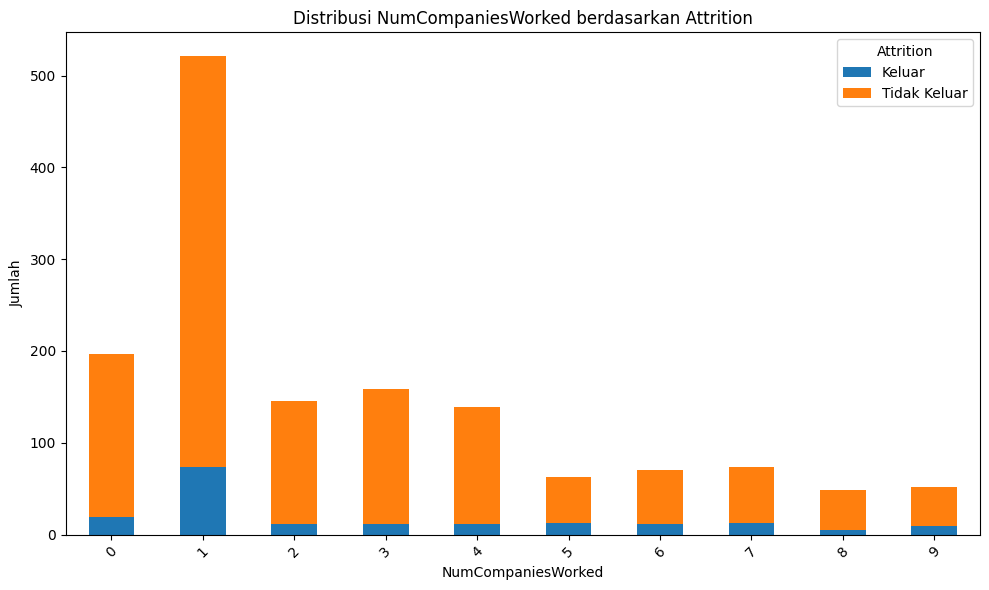

In [ ]:
plot_kategori_bivariate(df_employee_eda, x='NumCompaniesWorked', hue='Attrition')

Visualisasi dan ringkasan statistik menunjukkan bahwa jumlah perusahaan sebelumnya berpengaruh terhadap kecenderungan seorang karyawan untuk keluar:
- Karyawan yang memiliki `riwayat bekerja di lebih dari 4 perusahaan` menunjukkan kecenderungan `attrition yang lebih tinggi`. Hal ini mungkin menunjukkan perilaku job-hopping atau ketidakpuasan jangka panjang.
- Di sisi lain, karyawan yang `bekerja di 2–4 perusahaan sebelumnya` memiliki tingkat `attrition yang relatif rendah`, yang bisa menandakan bahwa mereka telah menemukan kecocokan dalam karier mereka saat ini.
- Karyawan yang `belum pernah bekerja di tempat lain (NumCompaniesWorked = 0)` juga menunjukkan tingkat `attrition yang rendah`, menunjukkan bahwa mereka cenderung bertahan, mungkin karena belum memiliki perbandingan atau pengalaman lain.

**Insight:** Secara keseluruhan, riwayat pekerjaan masa lalu dapat menjadi indikator penting dalam proses rekrutmen maupun dalam merancang strategi retensi. Karyawan dengan sejarah kerja yang panjang dan berpindah-pindah perlu mendapat perhatian khusus dalam fase onboarding dan pengembangan karier, untuk meningkatkan komitmen mereka terhadap organisasi.

### 3.1.3. Multivariate Analysis

Attrition                   1.000000
DistanceFromHome            0.078074
NumCompaniesWorked          0.037429
MonthlyRate                 0.023299
PerformanceRating           0.007755
PercentSalaryHike           0.004907
HourlyRate                 -0.017524
EmployeeId                 -0.017912
YearsSinceLastPromotion    -0.031944
Education                  -0.032631
TrainingTimesLastYear      -0.047859
DailyRate                  -0.051992
RelationshipSatisfaction   -0.053417
WorkLifeBalance            -0.059556
JobSatisfaction            -0.091751
EnvironmentSatisfaction    -0.132848
YearsAtCompany             -0.135134
JobInvolvement             -0.150196
YearsWithCurrManager       -0.155962
YearsInCurrentRole         -0.158757
MonthlyIncome              -0.163600
StockOptionLevel           -0.164228
JobLevel                   -0.169201
Age                        -0.172067
TotalWorkingYears          -0.177137
EmployeeCount                    NaN
StandardHours                    NaN
N

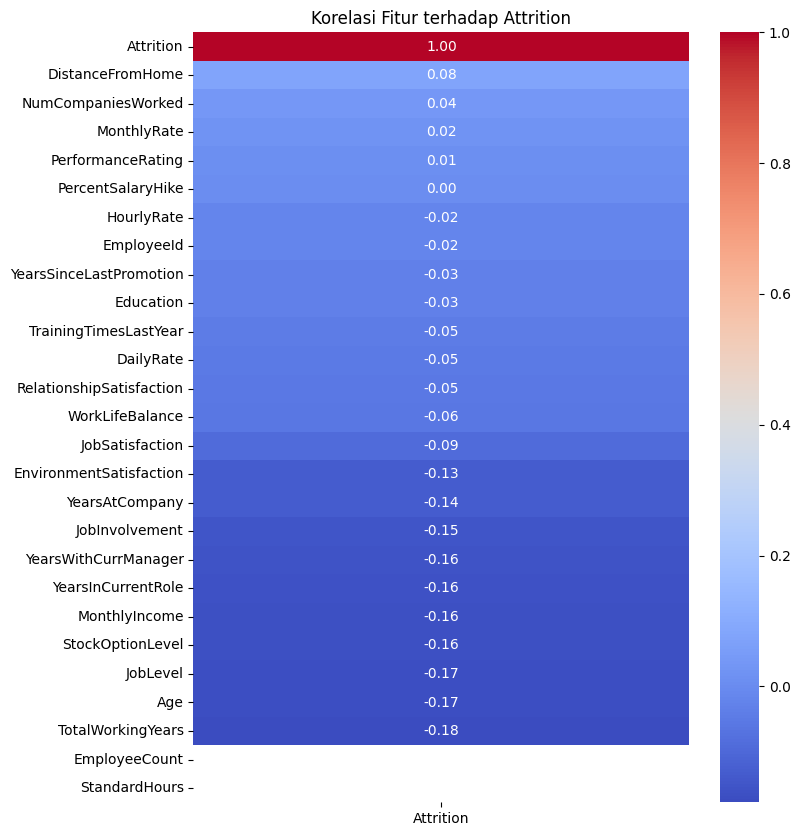

In [ ]:
plt.figure(figsize=(8, 10))

correlation_with_attrition = df_employee.corr(numeric_only=True)['Attrition'].sort_values(ascending=False)
print(correlation_with_attrition)
print("\n")

print("Visualisasi:")
sns.heatmap(correlation_with_attrition.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Korelasi Fitur terhadap Attrition")
plt.show()

## **4. Data Preparation**

### 4.1. Menghapus Missing Values

In [ ]:
pd.()

SyntaxError: invalid syntax (<ipython-input-129-3febb77a71ac>, line 1)

# Univariate Analysis

#### Categorical Features

In [ ]:
ordinal_categorical_cols = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
    'StockOptionLevel', 'WorkLifeBalance'
]

In [ ]:
plot_kategori(df_employee_eda, 'BusinessTravel')

In [ ]:
plot_kategori(df_employee_eda, 'Department')

In [ ]:
plot_kategori(df_employee_eda, 'EducationField')

In [ ]:
plot_kategori(df_employee_eda, 'Gender')

In [ ]:
plot_kategori(df_employee_eda, 'JobRole')

In [ ]:
plot_kategori(df_employee_eda, 'MaritalStatus')

In [ ]:
plot_kategori(df_employee_eda, 'Over18')

In [ ]:
plot_kategori(df_employee_eda, 'OverTime')

In [ ]:
plot_kategori(df_employee_eda, 'Education')

In [ ]:
plot_kategori(df_employee_eda, 'EnvironmentSatisfaction')

In [ ]:
plot_kategori(df_employee_eda, 'JobInvolvement')

In [ ]:
plot_kategori(df_employee_eda, 'JobLevel')

In [ ]:
plot_kategori(df_employee_eda, 'JobSatisfaction')

In [ ]:
plot_kategori(df_employee_eda, 'PerformanceRating')

In [ ]:
plot_kategori(df_employee_eda, 'RelationshipSatisfaction')

In [ ]:
plot_kategori(df_employee_eda, 'StockOptionLevel')

In [ ]:
plot_kategori(df_employee_eda, 'WorkLifeBalance')